In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tqdm import tqdm
import random

In [2]:
#_DATA_SET = "D:/9th semester/COMPUTER VISION AND PATTERN RECOGNITION/cifar-10"
_TRAIN_IMGS = []
_DATA_SET='D:/9th semester/COMPUTER VISION AND PATTERN RECOGNITION/cifar-10'
_CATEGORIES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
path=os.path.join(_DATA_SET,'train')
f=pd.read_csv('D:/9th semester/COMPUTER VISION AND PATTERN RECOGNITION/cifar-10/trainLabels.csv')
IMG_SIZE = 100
 

for img in tqdm(os.listdir(path)): 
    img_split=img.split('.')
    img_label=img_split[0]
    img_label_index=int(img_label)-1
    img_arr=cv2.imread(os.path.join(path,img))
    img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    class_name=_CATEGORIES.index(f['label'][img_label_index])
    _TRAIN_IMGS.append([img_resized,class_name])


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4772.96it/s]


cat


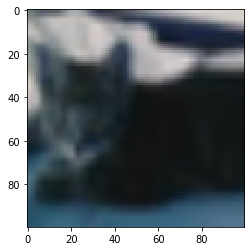

In [4]:

plt.imshow(_TRAIN_IMGS[1][0])
print(_CATEGORIES[_TRAIN_IMGS[1][1]])

In [5]:
random.shuffle(_TRAIN_IMGS)

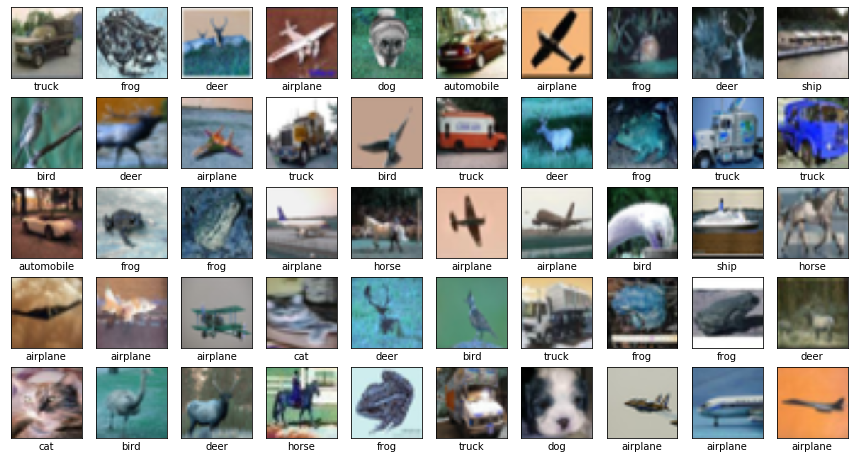

In [6]:
plt.figure(figsize=(15,8))

for i in range(50):
    plt.subplot(5,10, i+1)
    plt.imshow(_TRAIN_IMGS[i][0],cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(_CATEGORIES[_TRAIN_IMGS[i][1]])
    
    
plt.show()

In [7]:
fold0 = _TRAIN_IMGS[0:10000]
fold1 = _TRAIN_IMGS[10000:20000]
fold2 = _TRAIN_IMGS[20000:30000]
fold3 = _TRAIN_IMGS[30000:40000]
fold4 = _TRAIN_IMGS[40000:50000]
'''
print("length", len(fold0))
print("length", len(fold1))
print("length", len(fold2))
print("length", len(fold3))
print("length", len(fold4))
'''
validation_set = fold0
xTrain_data = fold1 + fold2 + fold3 +fold4


0it [00:00, ?it/s]


ValueError: operands could not be broadcast together with shapes (100,100,3) (2,) 

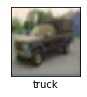

In [8]:
plt.figure(figsize=(15,15))
tmpIndex = 1
for i in range(10):
    
    plt.subplot(10, 10, tmpIndex)
    plt.imshow(validation_set[i][0], cmap=plt.cm.gray)
    plt.xlabel(_CATEGORIES[validation_set[i][1]])
    plt.xticks([])
    plt.yticks([])
    
    arr = []
    for j,k in tqdm(enumerate(xTrain_data)):
        dist_arr = np.abs(validation_set[i][0] - xTrain_data[j]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)
    
    
    min_index = np.argmin(arr)
    
    plt.subplot(10, 10, tmpIndex+1)
    plt.imshow(xTrain_data[min_index], cmap=plt.cm.gray)
    tmpIndex += 10
    #break
    
print("i=", i)
print(arr)
print(arr[min_index])
    
plt.show()
    

In [9]:
print(validation_set[1][0].shape)

(100, 100, 3)


In [13]:
print(validation_set[1][0].shape,validation_set[1][0].dtype)
print(xTrain_data[1][0].shape,validation_set[1][0].dtype)


(100, 100, 3) uint8
(100, 100, 3) uint8
